In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import string
from nltk.corpus import stopwords

# Mensagens

In [4]:
# mensagens a analisar
corpus_array = [     'This is the first document.',
   'This document is the second document.',
    'And this is the third one.',
     'Is this the first document?',]

In [5]:
# classificação das mensagens
label_array = ["ham", "ham", "spam", "spam"]

In [6]:
# transformaçao das mensagens em dataframe
corpus = pd.DataFrame({"message":corpus_array,"label":label_array})
corpus

,message,label
0,This is the first document.,ham
1,This document is the second document.,ham
2,And this is the third one.,spam
3,Is this the first document?,spam


# Contagem das plavras por mensagem

In [7]:
# pode-se usar o stopwords para não serem consideradas as palavras comuns
vectorizer = CountVectorizer()

In [8]:
# Ajuste e transformação do CountVectorizer() para transformar as mensagem numa matriz de contagem de palavras
# para se contar quantas vezes ocorre cada palavra por mensagem
message_count = vectorizer.fit_transform(corpus["message"])

In [9]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [10]:
# Indices das palvras
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [11]:
# numero de palavras diferentes
len(vectorizer.vocabulary_)

9

In [12]:
# transformação em array da matriz com a contagem de palavras
message_count.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [13]:
# dataframe com a contagem de palavras
df = pd.DataFrame(message_count.toarray())
column = vectorizer.get_feature_names()
df.columns=column

df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [14]:
# segunda mensagem
# indices das palavras e quantas vezes se repetem
print(df.iloc[1])

and         0
document    2
first       0
is          1
one         0
second      1
the         1
third       0
this        1
Name: 1, dtype: int64


In [15]:
# obter as plavras da segunda mensagem pelo indice
print(vectorizer.get_feature_names()[5])
print(vectorizer.get_feature_names()[1])

second
document


# Importancia das palavras nas mensagens

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
# Ajustar e transformar a matriz com a contagem das palavras numa matriz de frequencia para analisar a frquencia com que as 
# palavras ocorrem e descobrir as mais importantes
transformer = TfidfTransformer()

In [18]:
message_freq = transformer.fit_transform(df)

In [19]:
# transformação em array da matriz com a frequencia de palavras
message_freq.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [20]:
# dataframe com a frequencia de palavras
freq = pd.DataFrame(message_freq.toarray())
column = vectorizer.get_feature_names()
freq.columns=column

freq

# Para a segunda mensagem a palavra document ocorre 2 vezes.
# tf=2
# numero total de mensagens=4
# numero de mensagem que contem a palavra document=3
# idf = np.log((4+1)/(3+1)) + 1 = 1.22314
# tf*idf=2.446287
# Depois é feita a normalização l2 para colocar os valores entre 0 e 1.

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [21]:
y_train=corpus["label"]
y_train

0     ham
1     ham
2    spam
3    spam
Name: label, dtype: object

# Reduzir a dimensionalidade

In [22]:
from sklearn.decomposition import TruncatedSVD

In [23]:
skasvd = TruncatedSVD(n_components=6)

In [24]:
skasvd.fit(freq)

TruncatedSVD(algorithm='randomized', n_components=6, n_iter=5,
       random_state=None, tol=0.0)

In [25]:
np.round(skasvd.singular_values_*100,2)

array([163.85,  92.72,  67.49,   0.  ])

In [26]:
np.round(skasvd.explained_variance_ratio_*100,2)

array([11.73, 56.73, 31.55,  0.  ])

In [27]:
# https://stackoverflow.com/questions/42558153/truncatedsvd-returning-incorrect-dimensions
# https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
# https://medium.com/@zhang_yang/python-code-examples-of-pca-v-s-svd-4e9861db0a71

# Principal component analysis (PCA) is usually explained via an eigen-decomposition of the covariance matrix. However, it can 
# also be performed via singular value decomposition (SVD)

# Para ficar com apenas os componentes mais importantes reduz-se a dimensionalidade da matriz de frequencia
# n_components=2: Reduzir de 9 para 4 atributos

# O numero de componentes que se pode obter,pela conjugação dos componentes iniciais, tem de ser menor ou igual ao numero de 
# amostras que se tem, neste caso 4(devido à algebra).

svd = TruncatedSVD(n_components=4, n_iter=7, random_state=42)

In [28]:
# Ajustar o svd aos dados e fazer a redução de dimensionalidade
reduction = svd.fit(freq)
reduction

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=7,
       random_state=42, tol=0.0)

In [29]:
# Nº de componentes
svd.n_components

4

In [30]:
np.round((reduction.explained_variance_ratio_*100),2)

array([11.73, 56.73, 31.55,  0.  ])

In [31]:
# Quantidade de informação retida
# O 1ª componente principal tem aproximadamente 25% da variancia dos dados(informação).
# O 2ª componente principal tem aproximadamente 17% da informação.
# Ao se reduzir para 2 dimensões estaria-se a excluir 57% da informação. 
 
# ERRO:
# O primeiro componente mantem 11% informação
# Enqunato o segundo componente mantem 57% informação
# Se utilizar apenas 1 componente so se retem 11% e devia-se reter 57% da informação

# https://github.com/scikit-learn/scikit-learn/issues/3047
# Truncated SVD does not find the directions of greatest variance when the data are not pre-centered.
# While PCA is accomplished (depending on the package used) by performing SVD on mean centered data. 

variancia = pd.DataFrame(np.round((svd.explained_variance_ratio_*100),2), columns=["variância"])
variancia

,variância
0,11.73
1,56.73
2,31.55
3,0.00


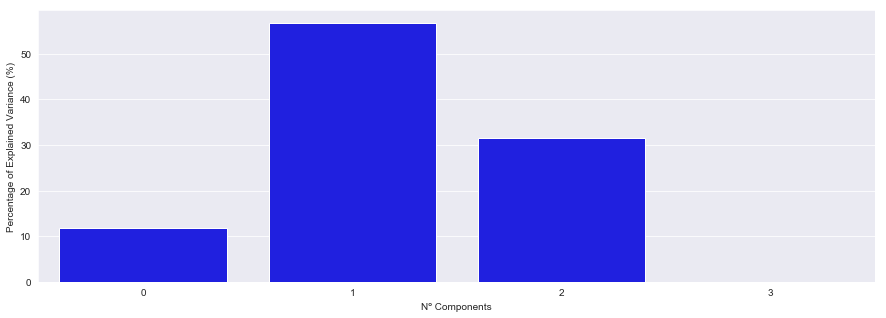

In [53]:
# O dataset inicial tem 77 dimensões(tipos de proteina)
# Reduzindo para 2 dimensões retem-se aproximadamente 43% da informação do dataset.
# Reduzindo para 3 dimensões retem-se aproximadamente 54% da informação do dataset.
# Reduzindo para 31 dimensões retem-se 95% da informação do dataset.
# Reduzindo para 20 dimensões retem-se 90% da informação do dataset.

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax = sns.barplot(x=variancia.index, y="variância", data=variancia, color="blue")

ax.set_ylabel('Percentage of Explained Variance (%)')
ax.set_xlabel('Nº Components')

plt.show()

#### SVD com os dados centrados

In [40]:
freq

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [41]:
# Centrar os dados através da média zero (das colunas,variaveis)

# transformação que tem a propriedade de transformar os parâmetros de qualquer distribuição de dados, de tal modo a que a média
# se torne igual a zero(centrar os dados na origem).

df1=freq-np.mean(freq, axis=0)
df1

,and,document,first,is,one,second,the,third,this
0,-0.127962,0.062990,0.290143,0.054995,-0.127962,-0.134662,0.054995,-0.127962,0.054995
1,-0.127962,0.280822,-0.290143,-0.048002,-0.127962,0.403986,-0.048002,-0.127962,-0.048002
2,0.383886,-0.406802,-0.290143,-0.061987,0.383886,-0.134662,-0.061987,0.383886,-0.061987
3,-0.127962,0.062990,0.290143,0.054995,-0.127962,-0.134662,0.054995,-0.127962,0.054995


In [54]:
# Confirmar que a media das colunas é aproximadamente zero
df1.mean(axis=1)

0   -0.000048
1   -0.014803
2    0.014899
3   -0.000048
dtype: float64

In [58]:
# Desvio padrão
# Outro passo que se pode fazer é normalizar o desvio padrão para 1. Para se obter
# uma distribuição normal(media zero e desvio padrão 1).

df1.std(axis=1)

0    0.143388
1    0.218034
2    0.299883
3    0.143388
dtype: float64

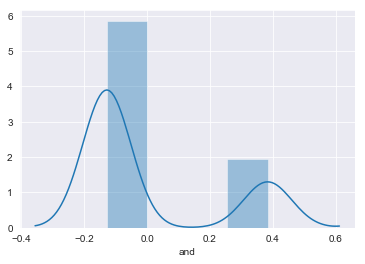

In [60]:
sns.distplot(df1["and"])

In [39]:
# Aplicar o svd aos dados centrados(igual ao PCA)
svd1 = TruncatedSVD(n_components=4, n_iter=7, random_state=42)

In [42]:
# Ajustar
reduction1 = svd1.fit(df1)

In [43]:
# A explained variance ratio está por ordem decrescente como no pca
np.round((reduction1.explained_variance_ratio_*100),2)

array([67.23, 32.77,  0.  ,  0.  ])

# Modelo de avaliação das mensagens

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# modelo de regressão logistica para prever a classificação da mensagem
logmodel = LogisticRegression(solver='liblinear')

In [45]:
# Ajustar o modelo as mensagens
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Prever conteudo de uma mensagem

In [46]:
# criar uma mensagem nova para avaliar se é ham ou spam
test_msg=["This is the first document."]

In [47]:
# contar as palavras da mensagem
msg_count = vectorizer.transform(test_msg)

In [48]:
# dataframe com a contagem de palavras
df_msg = pd.DataFrame(msg_count.toarray())
column = vectorizer.get_feature_names()
df_msg.columns=column

df_msg

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1


In [49]:
# avaliar as palavras mais importantes
mesg_freq = transformer.transform(msg_count)

In [50]:
mesg_freq.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [51]:
# dataframe com a frequencia de palavras
X_test = pd.DataFrame(mesg_freq.toarray())
column = vectorizer.get_feature_names()
X_test.columns=column

X_test

,and,document,first,is,one,second,the,third,this
0,0.0,0.469791,0.580286,0.384085,0.0,0.0,0.384085,0.0,0.384085


In [52]:
predictions = logmodel.predict(X_test)
predictions

array(['ham'], dtype=object)

# Utilizando o Pipeline

In [53]:
X_train = corpus["message"]

In [54]:
y_train = corpus["label"]

In [55]:
X_test = ["This is the first document."]

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
# criação do pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', LogisticRegression(solver='liblinear')),  # Define a classe que realizará nossa classificação.
])

In [58]:
# ajuste do pipline aos dados de treino
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [59]:
# prever o conteudo de uma mensagem
predictions = pipeline.predict(X_test)
predictions

array(['ham'], dtype=object)

# Utilizando o tratamento do texto

In [60]:
# palavras comuns que podem ser utilizadastanto em ham como spam
stop = stopwords.words("english")

In [61]:
# verificar se name está nas stopwords
list(filter(lambda x:"name" in x, stop))

[]

In [62]:
# sinais de ponctuação
punct = string.punctuation

In [63]:
# verificar se ! está nas stopwords
list(filter(lambda x:"!" in x, punct))

['!']

In [64]:
# string original
s = "I Bruno my name is Elizabeth !"

In [65]:
# string em minusculas
s_lower = str.lower(s)
s_lower

'i bruno my name is elizabeth !'

In [66]:
# palavras separadas do string
s_sep = s_lower.split()
s_sep

['i', 'bruno', 'my', 'name', 'is', 'elizabeth', '!']

In [79]:
# palavras do string sem a ponctuação
# List Comprehension
# [ expression for item in list if conditional ]
s_punct= [x for x in s_sep if x not in punct]
s_punct

['i', 'bruno', 'my', 'name', 'is', 'elizabeth']

In [80]:
def s_punct1():
    s_punct=[]
    for x in s_sep:    
        if x not in punct:
            s_punct.append(x)
    return s_punct

s_punct1()

['i', 'bruno', 'my', 'name', 'is', 'elizabeth']

In [81]:
# palavras do string sem as stopwords
# List Comprehension
s_stop = [x for x in s_punct if x not in stop]
s_stop

['bruno', 'name', 'elizabeth']

In [190]:
s_lemma = [lemmatizer.lemmatize(x) for x in s_stop]
s_lemma

['bruno', 'name', 'elizabeth']

In [191]:
# juntar as palavras
s_join = " ".join(s_lemma)
s_join

'bruno name elizabeth'

In [83]:
# colocar tudo numa função
def string_transform(string):
    s_lower = str.lower(string)
    s_sep = s_lower.split()     
    s_punct= [x for x in s_sep if x not in punct]
    s_missing = [x for x in s_punct if x not in stop]
    s_join= " ".join(s_missing)
    return s_join

In [84]:
# Manteve-se as palavras que não aparecem nas stop words
string_transform(s)

'bruno name elizabeth'

In [85]:
# Aplicar a função ao dataframe
corpus["message"]

0              This is the first document.
1    This document is the second document.
2               And this is the third one.
3              Is this the first document?
Name: message, dtype: object

In [86]:
# primeira mensagem no formato original
corpus["message"][0]

'This is the first document.'

In [87]:
# aplicação da função ao dataframe
corpus["message"] = corpus["message"].apply(string_transform)

In [88]:
# mensagens tranformadas
corpus["message"]

0              first document.
1    document second document.
2                   third one.
3              first document?
Name: message, dtype: object

In [89]:
vectorizer = CountVectorizer()

In [90]:
message_count = vectorizer.fit_transform(corpus["message"])

In [91]:
print(vectorizer.get_feature_names())

['document', 'first', 'one', 'second', 'third']


In [92]:
vectorizer.vocabulary_

{'first': 1, 'document': 0, 'second': 3, 'third': 4, 'one': 2}

In [93]:
message_count.toarray()

array([[1, 1, 0, 0, 0],
       [2, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0]], dtype=int64)

In [94]:
# dataframe com a contagem de palavras
df = pd.DataFrame(message_count.toarray())
column = vectorizer.get_feature_names()
df.columns=column

df

,document,first,one,second,third
0,1,1,0,0,0
1,2,0,0,1,0
2,0,0,1,0,1
3,1,1,0,0,0


## Utilizando o tratamento do texto no analyser

In [95]:
# O tratamento de texto acima pode ser feito utilizando o analyser.
# colocar tudo numa função
def string_transform_1(string):
    s_lower = str.lower(string)
    s_sep = s_lower.split()     
    s_punct= [x for x in s_sep if x not in punct]
    s_missing = [x for x in s_punct if x not in stop]
    #s_join= " ".join(s_missing)
    return s_missing

In [96]:
vectorizer_1 = CountVectorizer(analyzer=string_transform_1)

In [97]:
message_count = vectorizer_1.fit_transform(corpus["message"])

In [98]:
print(vectorizer_1.get_feature_names())

['document', 'document.', 'document?', 'first', 'one.', 'second', 'third']


In [99]:
vectorizer_1.vocabulary_

{'first': 3,
 'document.': 1,
 'document': 0,
 'second': 5,
 'third': 6,
 'one.': 4,
 'document?': 2}

In [100]:
message_count.toarray()

array([[0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [101]:
# dataframe com a contagem de palavras
df = pd.DataFrame(message_count.toarray())
column = vectorizer_1.get_feature_names()
df.columns=column

df

,document,document.,document?,first,one.,second,third
0,0,1,0,1,0,0,0
1,1,1,0,0,0,1,0
2,0,0,0,0,1,0,1
3,0,0,1,1,0,0,0


# Utilizando o Pipline com tratamento do texto

In [102]:
corpus_array = [     'This is the first document.',
   'This document is the second document.',
    'And this is the third one.',
     'Is this the first document?',]

In [103]:
# classificação das mensagens
label_array = ["ham", "ham", "spam", "spam"]

In [104]:
# transformaçao das mensagens em dataframe
corpus = pd.DataFrame({"message":corpus_array,"label":label_array})
corpus

,message,label
0,This is the first document.,ham
1,This document is the second document.,ham
2,And this is the third one.,spam
3,Is this the first document?,spam


In [105]:
vectorizer_pip = CountVectorizer(analyzer=string_transform_1)

In [106]:
transformer_pip = TfidfTransformer()

In [107]:
logmodel_pip = LogisticRegression(solver='liblinear')

In [108]:
# criação do pipeline
pipeline = Pipeline(steps = [('bow', vectorizer_pip), # Tokeniza as mensagens
                              ('tfidf', transformer_pip), # Faz a transformação em TF-IDF
                              ("classifier",logmodel_pip)]) # Define a classe que realizará nossa classificação

In [109]:
print(vectorizer_pip.get_feature_names())

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [110]:
vectorizer_pip

CountVectorizer(analyzer=<function string_transform_1 at 0x000000465780BEA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [111]:
message_count = vectorizer_pip.fit_transform(corpus["message"])

In [112]:
message_count.toarray()

array([[0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [113]:
# dataframe com a contagem de palavras
df = pd.DataFrame(message_count.toarray())
column = vectorizer_pip.get_feature_names()
df.columns=column

df

,document,document.,document?,first,one.,second,third
0,0,1,0,1,0,0,0
1,1,1,0,0,0,1,0
2,0,0,0,0,1,0,1
3,0,0,1,1,0,0,0


In [114]:
# ajuste do pipline aos dados de treino
pipeline.fit(corpus["message"],y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function string_transform_1 at 0x000000465780BEA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [115]:
X_test = ["This is the first document."]

In [116]:
# prever o conteudo de uma mensagem
predictions = pipeline.predict(X_test)
predictions

array(['ham'], dtype=object)

# Utilizando o tratamento do texto e posteriormente o pipline

In [117]:
def string_transform(string):
    s_lower = str.lower(string)
    s_sep = s_lower.split()     
    s_punct= [x for x in s_sep if x not in punct]
    s_missing = [x for x in s_punct if x not in stop]
    s_join= " ".join(s_missing)
    return s_join

In [118]:
# aplicação da função ao dataframe
corpus["message"] = corpus["message"].apply(string_transform)
corpus["message"]

0              first document.
1    document second document.
2                   third one.
3              first document?
Name: message, dtype: object

In [119]:
corpus

,message,label
0,first document.,ham
1,document second document.,ham
2,third one.,spam
3,first document?,spam


In [120]:
# criação do pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', LogisticRegression(solver='liblinear')),  # Define a classe que realizará nossa classificação.
])

In [121]:
# ajuste do pipline aos dados de treino
pipeline.fit(corpus["message"],y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [122]:
X_test = ["This is the first document."]

In [123]:
# prever o conteudo de uma mensagem
predictions = pipeline.predict(X_test)
predictions

array(['ham'], dtype=object)

## Experimentando o NLTK

In [145]:
from nltk.stem import WordNetLemmatizer

In [125]:
from nltk.tokenize import word_tokenize

In [126]:
from nltk.corpus import stopwords

In [127]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [149]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [154]:
# mensagens a analisar
corpus_array = [     'This is the first documents.',
   'This document is the second document.',
    'And this is the third one.',
     'Is this the first document?',]

In [202]:
a = corpus_array[0]
a

'This is the first documents.'

In [203]:
# Ciar tokens com o nltk
token = word_tokenize(a)
token

['This', 'is', 'the', 'first', 'documents', '.']

In [204]:
# remover stop words com o nltk
stop = stopwords.words("english")
stop[0:3]

['i', 'me', 'my']

In [205]:
missing = [x for x in s_punct if x not in stop]
missing

['bruno', 'name', 'elizabeth']

In [208]:
# criar lemmas(colocar as palavras no singular) com o nltk
lemmatizer = WordNetLemmatizer()

In [209]:
lemmatizer.lemmatize(token[4])

'document'

In [210]:
# colocar tudo numa função
def string_transform(string):
    s_lower = str.lower(string) 
    s_sep = word_tokenize(s_lower)   
    s_punct= [x for x in s_sep if x not in punct]
    s_missing = [x for x in s_punct if x not in stop]
    s_lemma = [lemmatizer.lemmatize(x) for x in s_missing]
    s_join= " ".join(s_lemma)
    return s_join

In [211]:
string_transform(corpus_array[0])

'first document'

# Modelo

In [ ]:
# Ver se existem dados inconsistentes(por ex classificações -1 estrela, 6 estrelas, ham, spam, tam) fazendo grafico
# Ver se existem dados ausentes
# Apagar dados ausentes ou substituir pela media, utilizando knn
# pesquisa das mensgens maiores
# grafico com tamanho das mensagems
# tabela com agrupamento do tipo de mensagens para contagem
# fazer pre processamento do texto(letras minusculas, pontuação, stopwords, etc) para numeros
# divisão treino-teste
# verificar a distribuição dos dados - se há dados dominantes
# modelo de machine learning com pipeline(contagem palvras, frequencia, modelo machine learnig)
# treinar o modelo pipeline com os dados treino
# fazer tabela da contagem de palavras
# fazer tabela da frequencia de plavras
# avaliar o modelo com os dados teste
# escolher o metodo de avaliação(recal precision,f1-score) por exemplo a accuracy não é um bom modelo para classes 
# desbalenciadas, se tiver 1 spam e 99 hams a accuray mesmo que falhe é alta.  
# fazer dataframe do matriz de confusão
# avaliar overfiting
# fazer grafico do modelo
# fazer previsões
# fazer grelha de parametros para encontrar os melhores e avaliar novamente o modelo
# fazer o mesmo modelo com deep learning

In [24]:
# data frame com os dados a analisar
df = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=["label","message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
# criar coluna com o tamanho das mensagens
df["length"] = df["message"].apply(len)

In [44]:
# agrupar as mensagens por ham e spam
label=df.groupby("label").describe()
label

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [42]:
# ver as mensagens ordenadas pelo seu tamanho
df.sort_values(by="length", ascending=True).head()

,label,message,length
4498,ham,Ok,2
3051,ham,Ok,2
1925,ham,Ok,2
5357,ham,Ok,2
3833,ham,Ok.,3


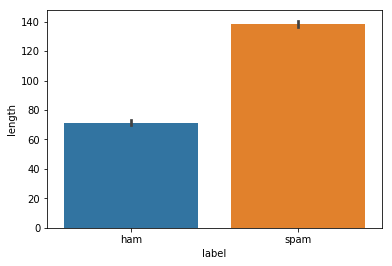

In [46]:
# grafico com o comprimento médio das mensagens de ham e spam
sns.barplot(data=df, x="label", y="length")

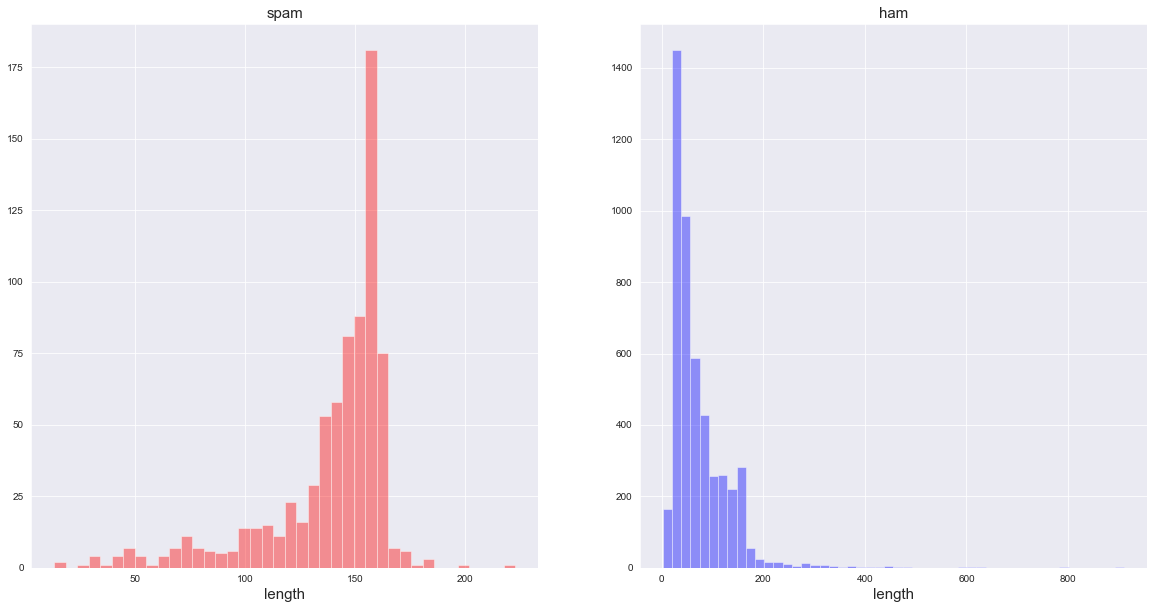

In [88]:
# grafico com o tamnho das mensagens de ham e spam
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax1 = sns.distplot(df[df["label"]=="spam"]["length"], ax=ax[0], color="red", kde=False)
ax1.set_title("spam", size=15)
ax1.set_xlabel("length", size=15)

ax2 = sns.distplot(df[df["label"]=="ham"]["length"], ax=ax[1], color="blue", kde=False)
ax2.set_title("ham", size=15)
ax2.set_xlabel("length", size=15)

plt.show()

In [95]:
# mensagens ham
df[df["label"]=="spam"].head()

,label,message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [97]:
# mensagens com mais de 800 caracteres
df[df["length"]>800].head()

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [113]:
#mensagens com 2 caracters
df.query("length == 2")

,label,message,length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


In [130]:
# mensagens ham com mais de 600 caracteres
df.query("label == 'ham' & length > 600 ")

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629


In [131]:
# mensagens ham com mais de 600 caracteres
df[(df["label"]=='ham') & (df["length"]>600 )]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629


In [134]:
# mensagem com mais caracteres
df["length"].max()

910

In [141]:
# conteudo da mensagem com mais caracteres
df[df["length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [181]:
# mensagem de tratamento do texto
def text_Edit(message):
    text_lower = str.lower(message) # colocar a mensagem em letras pequenas
    text_split = text_lower.split()  # separar as palavras
    text_punct = [x for x in text_split if x not in string.punctuation] # remover a pontuação
    text_stop = [x for x in text_punct if x not in stopwords.words("english")] # remover as stop words
    text_join = " ".join(text_stop)
    return text_join